# Let's get started and get our credentials first


### Importing important libraries first

In [ ]:
# Ensure you have these necessary pack lages installed
!pip install tweepy
!pip install gmaps
!pip install GoogleMaps
!pip install wordcloud
!pip install missingno
!pip install gmplot

In [1]:
#import libraries
# General:
import tweepy           # To consume Twitter's API
import pandas as pd     # To handle data
import numpy as np      # For numerical computation

# For plotting and visualization:
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#sentiment analysis
from textblob import TextBlob
from wordcloud import WordCloud
#cleaning
import re
plt.style.use('fivethirtyeight')

In [2]:
# Consumers:
# Consumer:
CONSUMER_KEY    ='fCDtsCAKnDXHjXKkMgsnAvmIp' #consumerkey
CONSUMER_SECRET = 'uuyLLc4B2ppt6HN7yw8A3f1hEtwh3GjLFGo5l2xj84GObBKYjU' #consumersecret

# Access:
ACCESS_TOKEN  = '1327238840751435779-zy94CACFWX14pDsnYHSlNBDYVf3luz' #acccess token
ACCESS_SECRET = 'EyP8JmHyUT9dphnBU3ecfbvmWzQtwM1g6YUdjCX0MN64o' #access secret

Store these credentials in a separate api_keys.json file so that the authentication information can be updated more easily without having to make changes to the Python code.

In [3]:
# Create the authentication object
authenticate = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET) 
    
# Set the access token and access token secret
authenticate.set_access_token(ACCESS_TOKEN, ACCESS_SECRET) 
    
# Creating the API object while passing in auth information
api = tweepy.API(authenticate, wait_on_rate_limit = True)

In [22]:
# Extract 200 tweets from the twitter user
posts = api.user_timeline(screen_name="RhapsodyDaily", count = 200, lang ="en", tweet_mode="extended")

#  Print the last 5 tweets
print("Show the 5 recent tweets:\n")
i=1
for tweet in posts[:5]:
    print(str(i) +') '+ tweet.full_text + '\n')
    i= i+1

Show the 5 recent tweets:

1) #RHAPSODY DAILY
RAISED TOGETHER WITH CHRIST
"When God raised Jesus from the dead, we were raised together with Him, to a newness of life." -Pastor Chris 

#dailydevo  #biblestudy #loveworld #JOY #today #daily #quotes #praise
https://t.co/DpHs6IuA8e https://t.co/YwKK2v6Rcu

2) #RHAPSODY DAILY
CHRIST AT HOME IN YOU
"Christ has made His home in your heart by faith; there's a mingling; a oneness of spirit." -Pastor Chris 

#dailydevo  #biblestudy #loveworld #JOY #today #daily #quotes #praise
https://t.co/DpHs6IuA8e https://t.co/JdDvwg6EmB

3) #RHAPSODY DAILY
ALIGN YOURSELF WITH GOD’S VISION
"Let the expansion of God’s Kingdom be your number one passion. Therein lies true joy, fulfilment and all the blessings you could ever desire." -Pastor Chris 

#dailydevo  #biblestudy  #quotes #praise
https://t.co/DpHs6IuA8e https://t.co/egzGYEicfb

4) #RHAPSODY DAILY
THE KINGDOM IN YOU
Jesus cautioned that when we’re told, “the Kingdom of God is over there,” or “it’s over 

In [23]:
# Create a dataframe with a column called Tweets
df = pd.DataFrame([tweet.full_text for tweet in posts], columns=['Tweets'])
# Show the first 5 rows of data
df.head()

,Tweets
0,#RHAPSODY DAILY\nRAISED TOGETHER WITH CHRIST\n...
1,"#RHAPSODY DAILY\nCHRIST AT HOME IN YOU\n""Chris..."
2,#RHAPSODY DAILY\nALIGN YOURSELF WITH GOD’S VIS...
3,#RHAPSODY DAILY\nTHE KINGDOM IN YOU\nJesus cau...
4,#RHAPSODY DAILY\nRIGHTEOUSNESS THROUGH THE GOS...


In [24]:
# Create a function to clean the tweets
def cleanTxt(text):
 text = re.sub('@[A-Za-z0–9]+', '', text) #Removing @mentions
 text = re.sub('#', '', text) # Removing '#' hash tag
 text = re.sub('RT[\s]+', '', text) # Removing RT
 text = re.sub('https?:\/\/\S+', '', text) # Removing hyperlink
 
 return text


# Clean the tweets
df['Tweets'] = df['Tweets'].apply(cleanTxt)

# Show the cleaned tweets
df

,Tweets
0,"RHAPSODY DAILY\nRAISED TOGETHER WITH CHRIST\n""..."
1,"RHAPSODY DAILY\nCHRIST AT HOME IN YOU\n""Christ..."
2,RHAPSODY DAILY\nALIGN YOURSELF WITH GOD’S VISI...
3,RHAPSODY DAILY\nTHE KINGDOM IN YOU\nJesus caut...
4,RHAPSODY DAILY\nRIGHTEOUSNESS THROUGH THE GOSP...
...,...
195,I just uploaded “Your Loveworld Day 9” to Vimeo:
196,I just uploaded “Your Loveworld Phase 7 day 7”...
197,I just uploaded “Your Loveworld Day 13” to Vim...
198,I just uploaded “Your Loveworld Phase 7 Day 6”...


In [25]:
# Create a function to get the subjectivity
def getSubjectivity(text):
   return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity
def getPolarity(text):
   return  TextBlob(text).sentiment.polarity


# Create two new columns 'Subjectivity' & 'Polarity'
df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)

# Show the new dataframe with columns 'Subjectivity' & 'Polarity'
df

,Tweets,Subjectivity,Polarity
0,"RHAPSODY DAILY\nRAISED TOGETHER WITH CHRIST\n""...",0.150000,0.150000
1,"RHAPSODY DAILY\nCHRIST AT HOME IN YOU\n""Christ...",0.066667,0.266667
2,RHAPSODY DAILY\nALIGN YOURSELF WITH GOD’S VISI...,0.283333,0.383333
3,RHAPSODY DAILY\nTHE KINGDOM IN YOU\nJesus caut...,0.066667,0.266667
4,RHAPSODY DAILY\nRIGHTEOUSNESS THROUGH THE GOSP...,0.000000,0.000000
...,...,...,...
195,I just uploaded “Your Loveworld Day 9” to Vimeo:,0.000000,0.000000
196,I just uploaded “Your Loveworld Phase 7 day 7”...,0.000000,0.000000
197,I just uploaded “Your Loveworld Day 13” to Vim...,0.000000,0.000000
198,I just uploaded “Your Loveworld Phase 7 Day 6”...,0.000000,0.000000


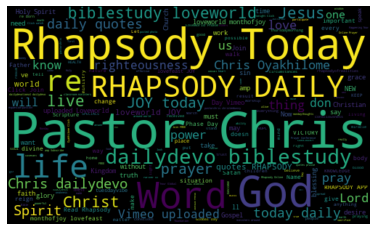

In [26]:
# word cloud visualization
allWords = ' '.join([twts for twts in df['Tweets']])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(allWords)


plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [27]:
# Create a function to compute negative (-1), neutral (0) and positive (+1) analysis
def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'
    
df['Analysis'] = df['Polarity'].apply(getAnalysis)
# Show the dataframe
df

,Tweets,Subjectivity,Polarity,Analysis
0,"RHAPSODY DAILY\nRAISED TOGETHER WITH CHRIST\n""...",0.150000,0.150000,Positive
1,"RHAPSODY DAILY\nCHRIST AT HOME IN YOU\n""Christ...",0.066667,0.266667,Positive
2,RHAPSODY DAILY\nALIGN YOURSELF WITH GOD’S VISI...,0.283333,0.383333,Positive
3,RHAPSODY DAILY\nTHE KINGDOM IN YOU\nJesus caut...,0.066667,0.266667,Positive
4,RHAPSODY DAILY\nRIGHTEOUSNESS THROUGH THE GOSP...,0.000000,0.000000,Neutral
...,...,...,...,...
195,I just uploaded “Your Loveworld Day 9” to Vimeo:,0.000000,0.000000,Neutral
196,I just uploaded “Your Loveworld Phase 7 day 7”...,0.000000,0.000000,Neutral
197,I just uploaded “Your Loveworld Day 13” to Vim...,0.000000,0.000000,Neutral
198,I just uploaded “Your Loveworld Phase 7 Day 6”...,0.000000,0.000000,Neutral


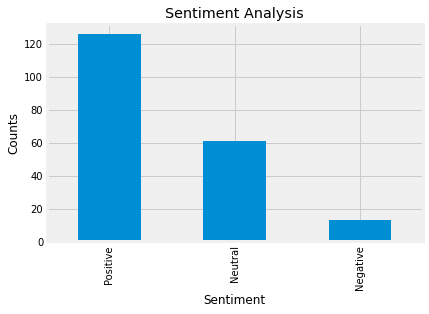

In [20]:
# Plotting and visualizing the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind = 'bar')
plt.show()

In [ ]:
df1=df.copy()

In [ ]:
df1.to_csv('tweets_data.csv',index=False,header=True)

In [ ]:
from google.colab import files
files.download('tweets_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>